
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
 [[28  5]
 [ 2 26]]
📁 Saved plot: ../data/plots\logistic_regression_cm_roc.png


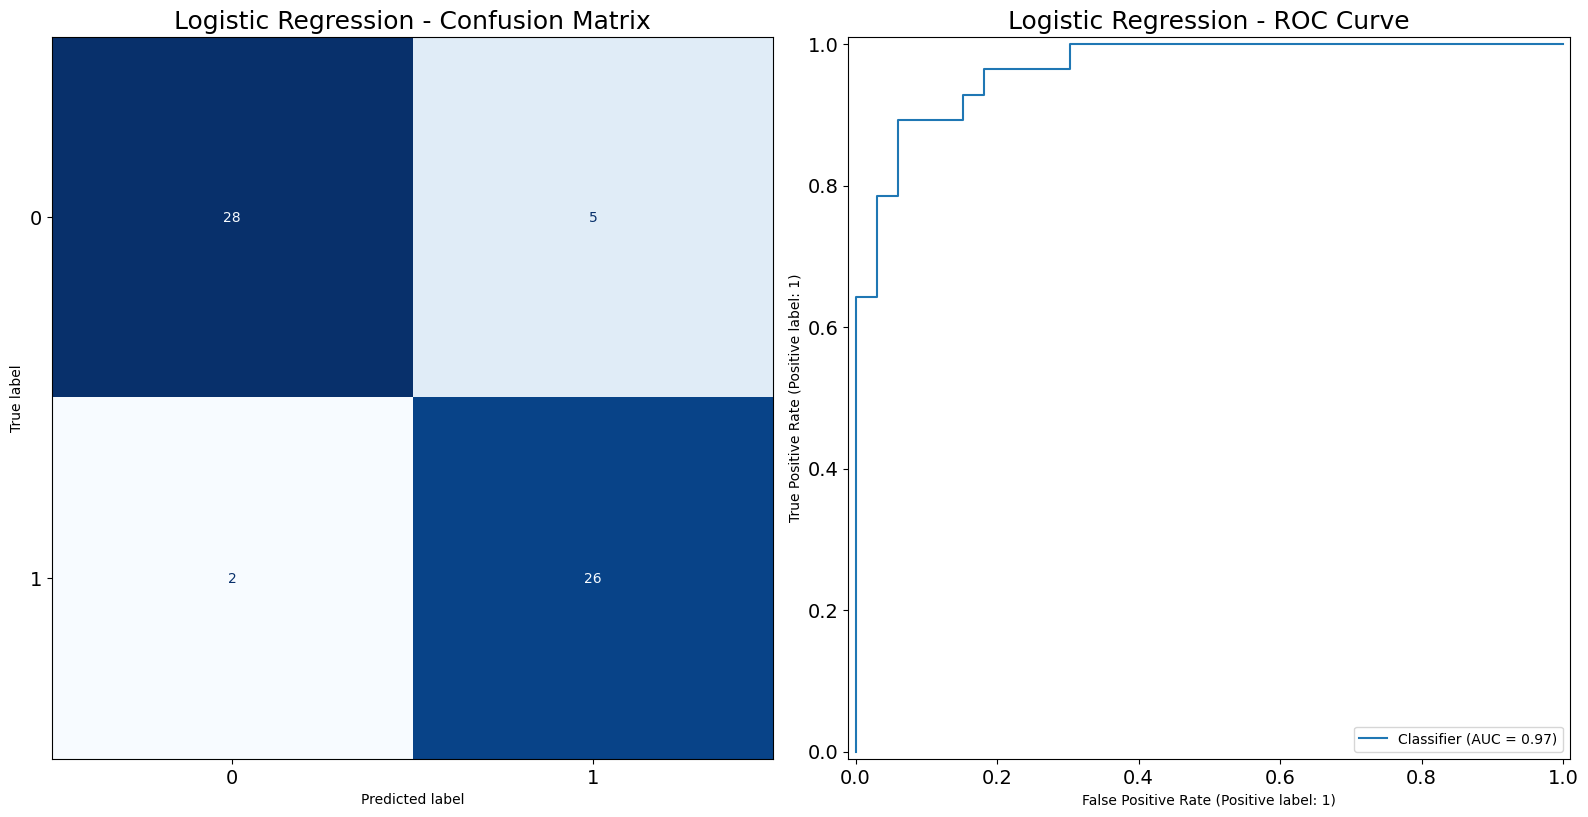


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75        33
           1       0.68      0.93      0.79        28

    accuracy                           0.77        61
   macro avg       0.80      0.78      0.77        61
weighted avg       0.81      0.77      0.77        61

Confusion Matrix:
 [[21 12]
 [ 2 26]]
📁 Saved plot: ../data/plots\decision_tree_cm_roc.png


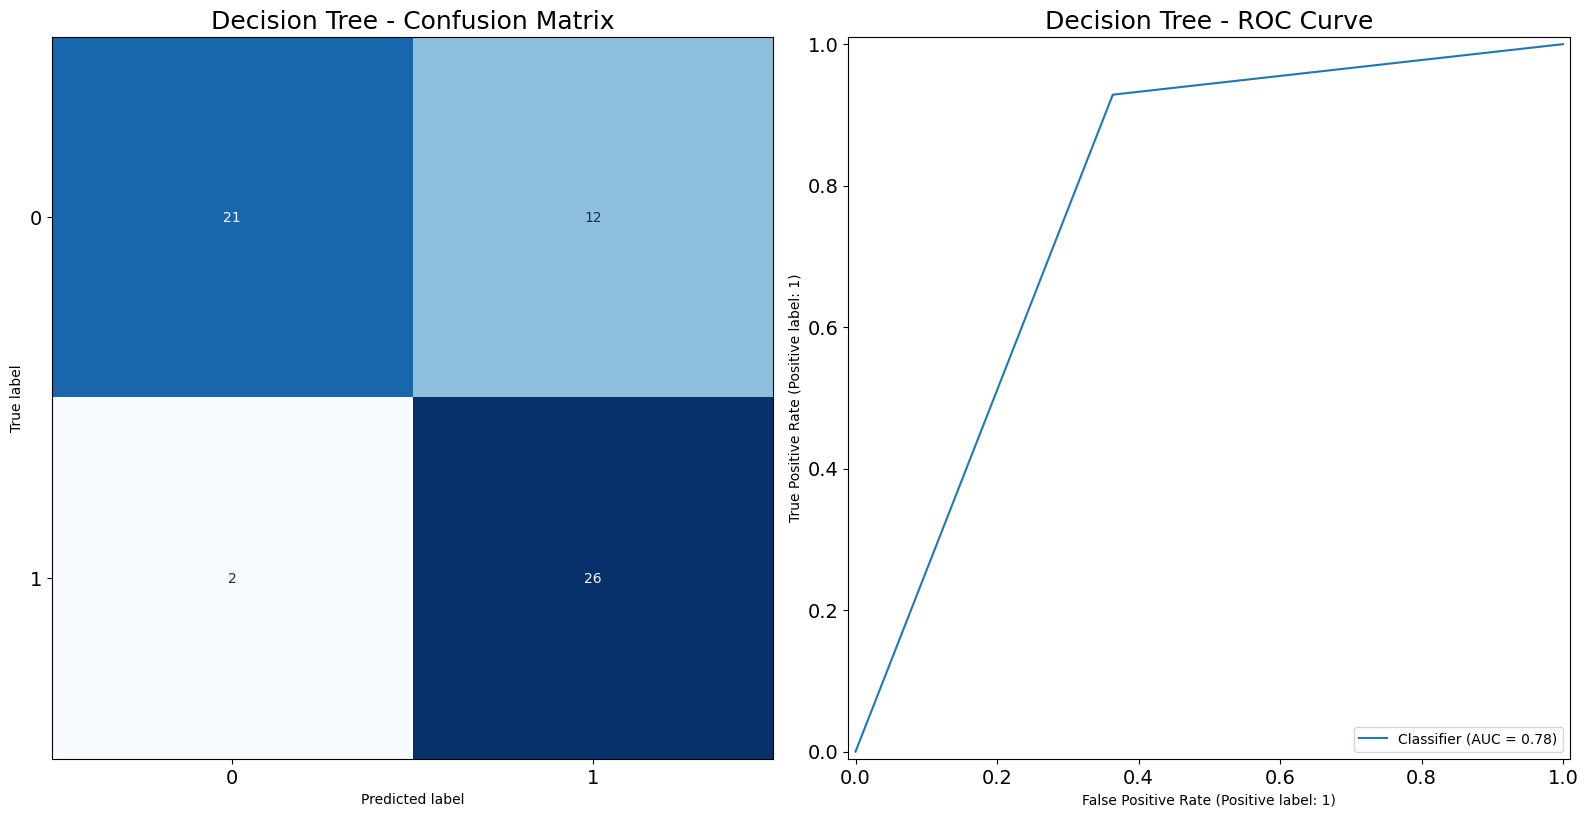


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

Confusion Matrix:
 [[27  6]
 [ 3 25]]
📁 Saved plot: ../data/plots\random_forest_cm_roc.png


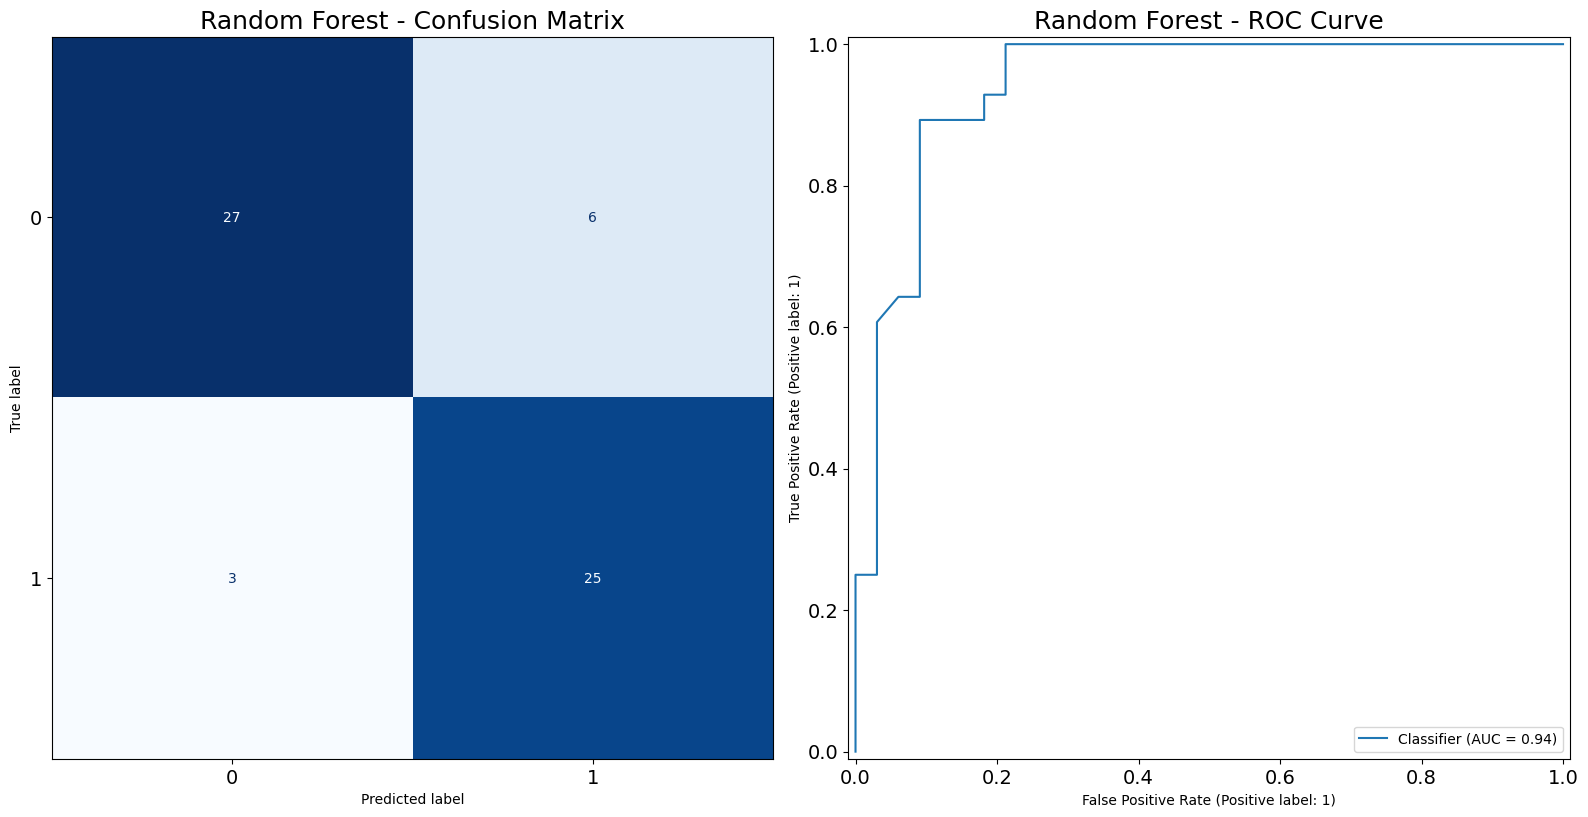


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
 [[28  5]
 [ 2 26]]
📁 Saved plot: ../data/plots\svm_cm_roc.png


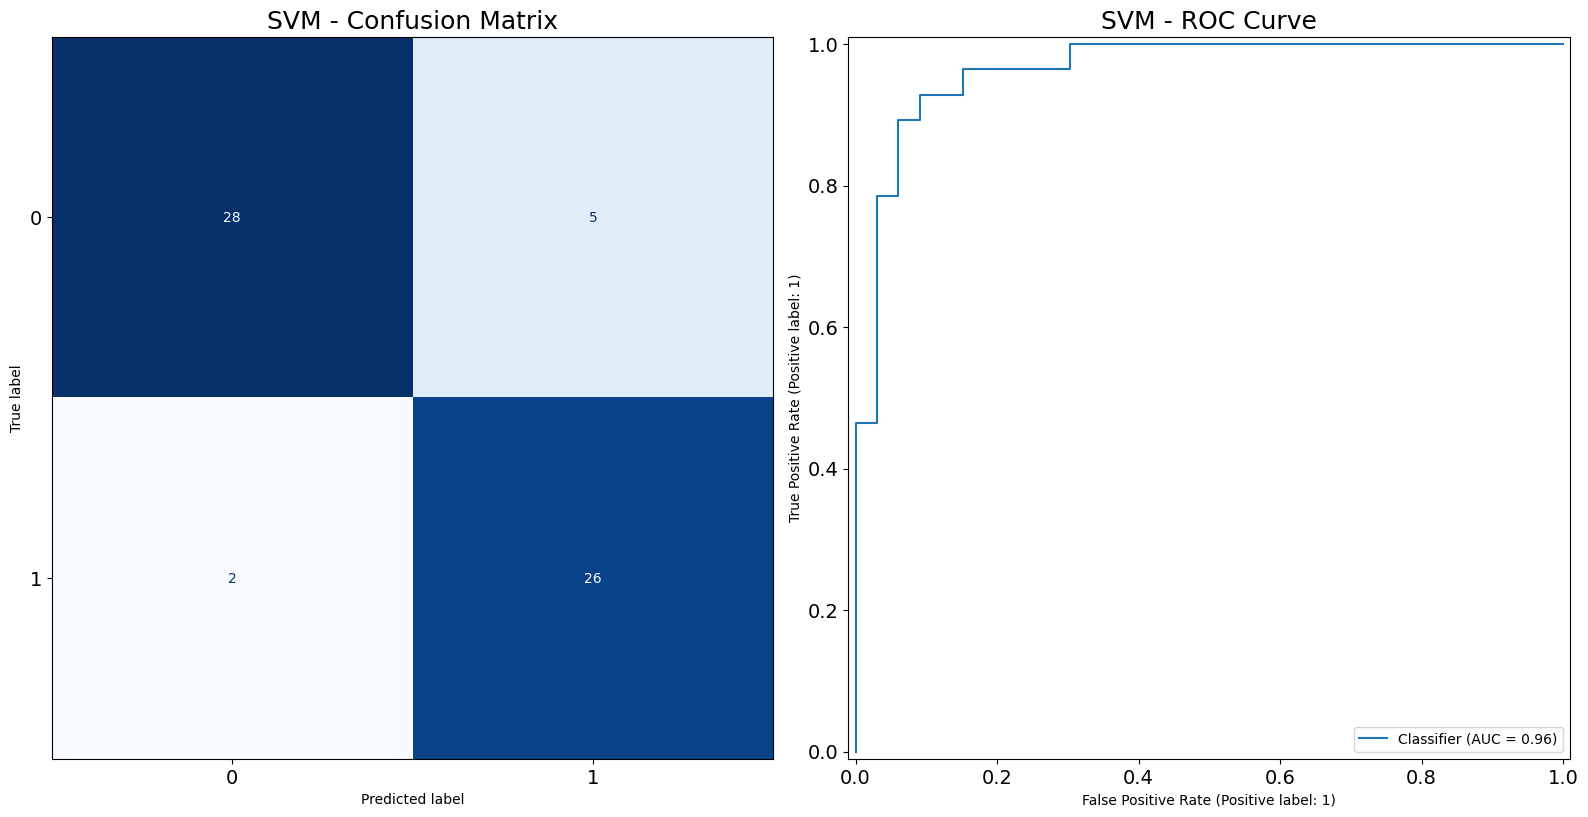

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
import os

# Create output folder for plots
plot_dir = "../data/plots"
os.makedirs(plot_dir, exist_ok=True)

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC AUC': roc
    }
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # --- Plot ROC Curve & Confusion Matrix side by side ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # bigger figure
    
    # Confusion matrix (make text large)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axes[0], cmap="Blues", colorbar=False)
    axes[0].set_title(f"{name} - Confusion Matrix", fontsize=18)
    axes[0].tick_params(axis='both', labelsize=14)
    
    # ROC curve
    if y_proba is not None:
        RocCurveDisplay.from_predictions(y_test, y_proba, ax=axes[1])
        axes[1].set_title(f"{name} - ROC Curve", fontsize=18)
        axes[1].tick_params(axis='both', labelsize=14)
    else:
        axes[1].axis("off")
        axes[1].set_title(f"{name} - ROC Curve (N/A)", fontsize=18)
    
    plt.tight_layout()
    
    # Save plot to file
    filename = f"{name.replace(' ', '_').lower()}_cm_roc.png"
    filepath = os.path.join(plot_dir, filename)
    plt.savefig(filepath, dpi=300)
    print(f"📁 Saved plot: {filepath}")
    
    plt.show()
